In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Missing Datapoints

In [5]:
# If we have missing values in our DataFrame then we have three options:
#     1) Get rid of the missing data points --> dropna()
#     2) Get rid of the whole attribute --> drop()
#     3) Insert some value according to the scenario(for example: 0 or mean or median) --> fillna()

In [6]:
%matplotlib inline

In [7]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

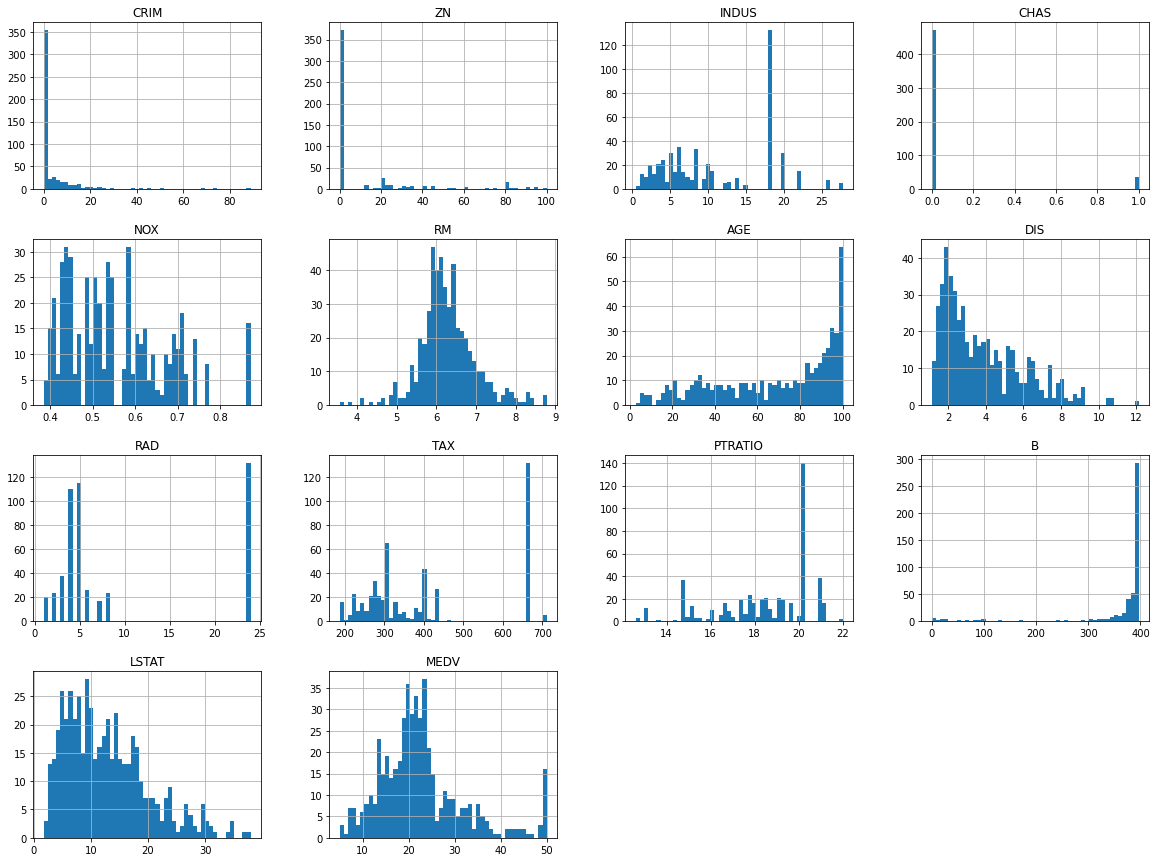

In [8]:
housing.hist(bins = 50, figsize = (20,15))

this method is not correct because there is a high chance that all 1's go in train_Set or test_set and when we test the 
model it finds out that there is 0 as output too

--> so the solution to the problem is that we need to do stratified shuffled splitting which ensures that that the train_set 
and the test_set has both 0 and 1

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, train_size=0.8, random_state = 42)

## Splitting the data

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [11]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## Looking for correalations

In [12]:
correlation_matrix = housing.corr()
correlation_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

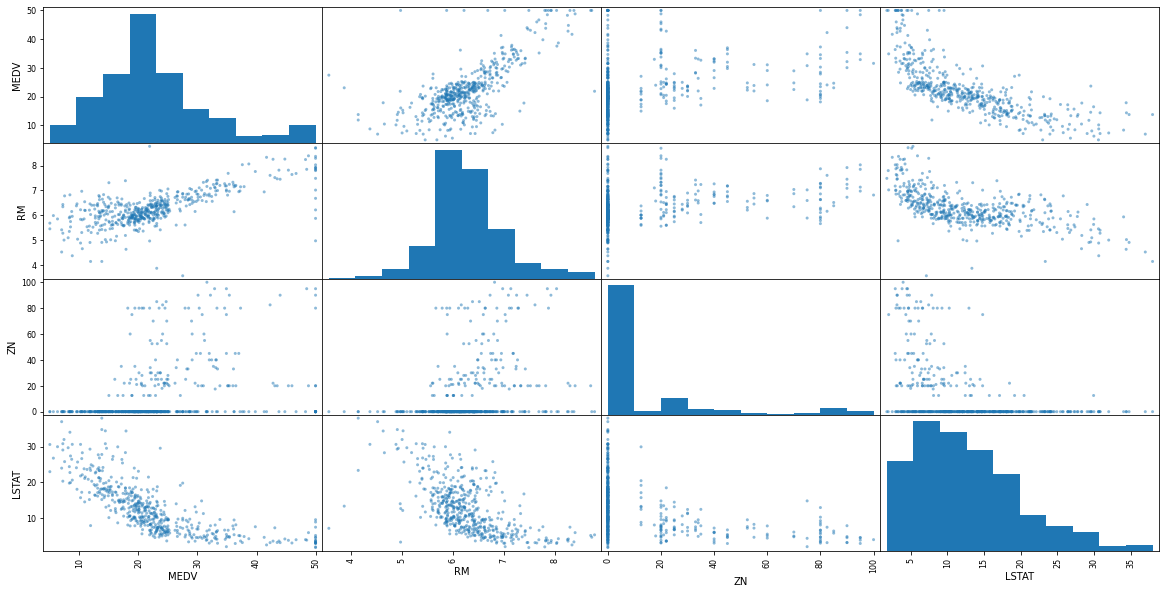

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', "LSTAT"]
scatter_matrix(housing[attributes], figsize=(20,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

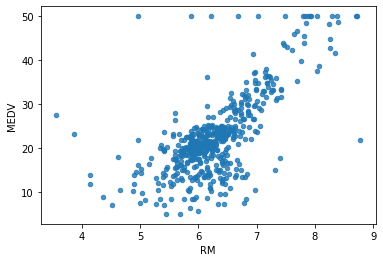

In [14]:
housing.plot(kind = 'scatter', x = "RM", y = "MEDV", alpha = 0.8)

In [15]:
housing= strat_train_set.drop("MEDV",axis=1)
housing_labels= strat_train_set["MEDV"].copy()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


## Creating Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
    ])

In [17]:
housing_tranformed = my_pipeline.fit_transform(housing)

In [18]:
housing_tranformed.shape

(404, 13)

In [19]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_tranformed,housing_labels)

RandomForestRegressor()

In [20]:
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [21]:
some_labels = housing_labels.iloc[:5]

In [22]:
prepared_data = my_pipeline.transform(some_data)

In [23]:
model.predict(prepared_data)

array([22.413, 25.54 , 16.426, 23.248, 23.619])

In [24]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_tranformed)
mse = mean_squared_error(housing_labels, housing_predictions)


In [26]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_tranformed,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores= np.sqrt(-scores)

In [27]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    

In [28]:
print_scores(rmse_scores)

Scores:  [2.97280345 2.77349988 4.4508058  2.75143129 3.23817747 2.6263845
 4.77009073 3.35462394 3.14626871 3.43765731]
Mean:  3.352174307804188
Standard Deviation:  0.6816621774624725


In [29]:
from joblib import dump, load
dump(model, 'Real_Estate_Project.joblib')

['Real_Estate_Project.joblib']

## Testing the data

In [30]:
X_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set['MEDV'].copy()
X_test_transformed = my_pipeline.transform(X_test)

test_predictions = model.predict(X_test_transformed)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

test_rmse



2.8312680177325653

In [31]:
test_predictions

array([24.502, 11.637, 25.874, 22.47 , 18.599, 14.725, 19.821, 14.678,
       32.987, 41.246, 19.123, 12.02 , 24.297, 26.439, 19.549, 11.102,
       31.994, 14.508, 23.357, 18.874, 19.872, 17.856, 16.127, 21.814,
       19.034, 31.069, 16.226, 32.521,  8.863, 33.911, 23.89 , 21.243,
       22.693, 11.218, 20.85 , 10.704, 43.187, 24.506, 23.53 , 42.611,
       24.16 , 29.876, 20.428, 20.844, 19.001, 33.562, 43.737, 20.236,
       20.504, 21.39 , 21.717, 14.476, 20.937, 15.643, 24.974, 33.127,
       42.313, 29.354, 19.824, 20.752, 46.673,  9.576, 19.174, 25.147,
       14.9  , 33.066, 20.001, 18.155, 19.256, 34.586, 25.702, 22.647,
       21.375, 22.336, 35.083, 12.162, 15.948, 20.135, 20.709, 21.349,
       22.162, 20.701, 13.841, 22.637, 20.779, 21.382, 13.665, 21.462,
       21.567, 23.215, 18.617, 27.065,  7.078, 25.803, 19.317, 29.403,
       19.658, 31.034, 14.409, 26.575, 21.257, 20.427])

In [32]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [33]:
## Usage of model

In [34]:
from joblib import dump, load
import numpy as np
model = load('Real_Estate_Project.joblib')
features = np.array([[-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
        0.0450661 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
        0.52982668,  0.45343469, -0.91902752]])
model.predict(features)

array([23.619])